# Cluster Analysis by machine learning model on Shopify customers dataset

### model trained on data until 4th of Dec. 2020

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import hashlib

PATH = 'shopify_all_customers.csv'
df = pd.read_csv(PATH, delimiter=',')

df.head()

,First Name,Last Name,Email,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt
0,Z,Bear,to.zachie@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.00,0,NaN,NaN,no
1,Carissa,Van Meter,classicwallflower@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.00,0,oxi_social_login,NaN,no
2,Arely,Joanna Medina,arelymedina@ymail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.00,0,NaN,NaN,no
3,emelia,hajdarovic,emelia.hajdarovic@gmail.com,NaN,2321 Esplanade,NaN,The Bronx,New York,NY,United States,US,10469,(917) 583-5881,yes,0.00,0,NaN,NaN,no
4,Jashziel,Samoy,jashzielsamoy@gmail.com,NaN,2861 Quadra St.,NaN,Victoria,British Columbia,BC,Canada,CA,V8T 4E5,(778) 533-3362,yes,155.93,1,NaN,NaN,no


## 1. Data preview and cleaning

In [ ]:
df_original = df.copy(deep=True)

df.head()

,First Name,Last Name,Email,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt
0,Z,Bear,to.zachie@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.00,0,NaN,NaN,no
1,Carissa,Van Meter,classicwallflower@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.00,0,oxi_social_login,NaN,no
2,Arely,Joanna Medina,arelymedina@ymail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.00,0,NaN,NaN,no
3,emelia,hajdarovic,emelia.hajdarovic@gmail.com,NaN,2321 Esplanade,NaN,The Bronx,New York,NY,United States,US,10469,(917) 583-5881,yes,0.00,0,NaN,NaN,no
4,Jashziel,Samoy,jashzielsamoy@gmail.com,NaN,2861 Quadra St.,NaN,Victoria,British Columbia,BC,Canada,CA,V8T 4E5,(778) 533-3362,yes,155.93,1,NaN,NaN,no


In [ ]:
df = df[['Email', 'Total Spent', 'Total Orders']]

In [ ]:
df.head()

,Email,Total Spent,Total Orders
0,to.zachie@gmail.com,0.00,0
1,classicwallflower@gmail.com,0.00,0
2,arelymedina@ymail.com,0.00,0
3,emelia.hajdarovic@gmail.com,0.00,0
4,jashzielsamoy@gmail.com,155.93,1


In [ ]:
df = df[df['Total Spent'] > 0]

In [ ]:
df

,Email,Total Spent,Total Orders
4,jashzielsamoy@gmail.com,155.93,1
6,lydier350@gmail.com,45.97,1
8,stephannie.l.rundle@medtronic.com,92.12,1
10,stuartgnielson@gmail.com,35.96,1
11,ana.jorge339@gmail.com,35.96,1
...,...,...,...
52051,lauren.bartleymavs@gmail.com,512.87,9
52061,hodosialexandra@gmail.com,159.96,4
52066,jennifer.rankin@me.com,1185.28,25
52070,sheanaparedes@gmail.com,63.99,1


In [ ]:
df['AvgOrderValue'] = df['Total Spent'] / df['Total Orders']
df.head()

,Email,Total Spent,Total Orders,AvgOrderValue
4,jashzielsamoy@gmail.com,155.93,1,155.93
6,lydier350@gmail.com,45.97,1,45.97
8,stephannie.l.rundle@medtronic.com,92.12,1,92.12
10,stuartgnielson@gmail.com,35.96,1,35.96
11,ana.jorge339@gmail.com,35.96,1,35.96


In [ ]:
df.describe()

,Total Spent,Total Orders,AvgOrderValue
count,13867.000000,13867.000000,13867.000000
mean,163.106083,2.655729,65.480210
std,201.794884,3.010684,38.562497
min,2.680000,1.000000,0.670000
25%,50.970000,1.000000,44.990000
50%,99.980000,1.000000,53.610000
75%,198.630000,3.000000,70.239286
max,3928.350000,48.000000,522.570000


In [ ]:
df.head()

,Email,Total Spent,Total Orders,AvgOrderValue
4,jashzielsamoy@gmail.com,155.93,1,155.93
6,lydier350@gmail.com,45.97,1,45.97
8,stephannie.l.rundle@medtronic.com,92.12,1,92.12
10,stuartgnielson@gmail.com,35.96,1,35.96
11,ana.jorge339@gmail.com,35.96,1,35.96


## 2. Normalize the values

#### to feed into our Cluster Analysis ML Model for training

In [ ]:
# df["Email"] = df["Email"].apply(lambda x: hashlib.sha256(str(x).encode("utf-8")).hexdigest())

In [ ]:
df

,Email,Total Spent,Total Orders,AvgOrderValue
4,jashzielsamoy@gmail.com,155.93,1,155.930000
6,lydier350@gmail.com,45.97,1,45.970000
8,stephannie.l.rundle@medtronic.com,92.12,1,92.120000
10,stuartgnielson@gmail.com,35.96,1,35.960000
11,ana.jorge339@gmail.com,35.96,1,35.960000
...,...,...,...,...
52051,lauren.bartleymavs@gmail.com,512.87,9,56.985556
52061,hodosialexandra@gmail.com,159.96,4,39.990000
52066,jennifer.rankin@me.com,1185.28,25,47.411200
52070,sheanaparedes@gmail.com,63.99,1,63.990000


In [ ]:
df_normalized = (df - df.mean()) / df.std()

In [ ]:
df_normalized

,AvgOrderValue,Email,Total Orders,Total Spent
4,2.345538,NaN,-0.549951,-0.035561
6,-0.505937,NaN,-0.549951,-0.580471
8,0.690821,NaN,-0.549951,-0.351773
10,-0.765516,NaN,-0.549951,-0.630076
11,-0.765516,NaN,-0.549951,-0.630076
...,...,...,...,...
52051,-0.220283,NaN,2.107252,1.733265
52061,-0.661010,NaN,0.446500,-0.015590
52066,-0.468564,NaN,7.421659,5.065410
52070,-0.038644,NaN,-0.549951,-0.491172


In [ ]:
df_normalized['Email'] = df['Email']
columns_titles = ["Email", "Total Orders", "Total Spent", "AvgOrderValue"]
df_normalized = df_normalized.reindex(columns=columns_titles)
df_normalized

,Email,Total Orders,Total Spent,AvgOrderValue
4,jashzielsamoy@gmail.com,-0.549951,-0.035561,2.345538
6,lydier350@gmail.com,-0.549951,-0.580471,-0.505937
8,stephannie.l.rundle@medtronic.com,-0.549951,-0.351773,0.690821
10,stuartgnielson@gmail.com,-0.549951,-0.630076,-0.765516
11,ana.jorge339@gmail.com,-0.549951,-0.630076,-0.765516
...,...,...,...,...
52051,lauren.bartleymavs@gmail.com,2.107252,1.733265,-0.220283
52061,hodosialexandra@gmail.com,0.446500,-0.015590,-0.661010
52066,jennifer.rankin@me.com,7.421659,5.065410,-0.468564
52070,sheanaparedes@gmail.com,-0.549951,-0.491172,-0.038644


In [ ]:
df_normalized.describe()

,Total Orders,Total Spent,AvgOrderValue
count,1.386700e+04,1.386700e+04,1.386700e+04
mean,5.324228e-14,4.951535e-14,1.355932e-13
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.499512e-01,-7.949958e-01,-1.680654e+00
25%,-5.499512e-01,-5.556934e-01,-5.313507e-01
50%,-5.499512e-01,-3.128230e-01,-3.078175e-01
75%,1.143496e-01,1.760397e-01,1.234120e-01
max,1.506112e+01,1.865877e+01,1.185322e+01


## 3. Customer segmentation by Cluster K-Means Model and Analysis

#### a. Training our model using cluster k-value = 4

In [ ]:
from sklearn.cluster import KMeans

kmeans_settings = {
    'algorithm': 'manual',
    'copy_x': True,
    'init': 'k-means++',
    'max_iter': 300,
    'n_clusters': 'manual',
    'n_init': 10,
    'n_jobs': None,
    'precompute_distances': 'auto',
    'random_state': None,
    'tol': 0.0001,
    'verbose': 0
}

kmeans = KMeans(n_clusters = 4, random_state=40).fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [ ]:
four_cluster_df = df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
four_cluster_df.head()

,Total Orders,Total Spent,AvgOrderValue,Cluster
4,-0.549951,-0.035561,2.345538,3
6,-0.549951,-0.580471,-0.505937,1
8,-0.549951,-0.351773,0.690821,1
10,-0.549951,-0.630076,-0.765516,1
11,-0.549951,-0.630076,-0.765516,1


In [ ]:
four_cluster_df.groupby('Cluster').count()['Total Spent']

Cluster
0    2286
1    9670
2     191
3    1720
Name: Total Spent, dtype: int64

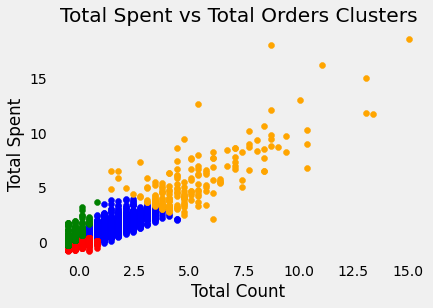

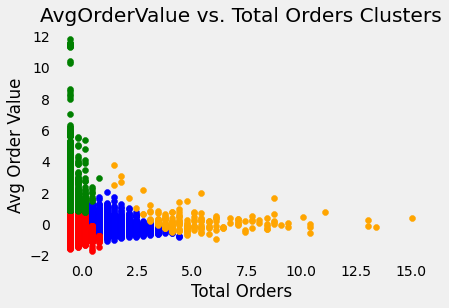

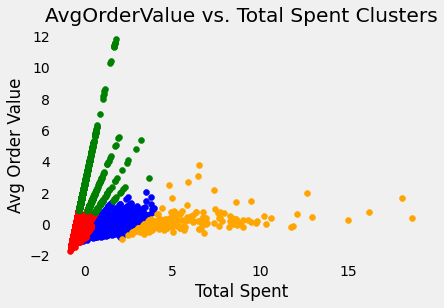

In [ ]:
# now we assign each clusters based on their column values, and we visualize the data using scatterplot.

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Spent'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Spent'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Spent'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Spent'],
    c='green'
)

plt.title('Total Spent vs Total Orders Clusters')
plt.xlabel('Total Count')
plt.ylabel('Total Spent')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. Total Orders Clusters')
plt.xlabel('Total Orders')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. Total Spent Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### b. Calculating the optimal value for k to double check accuracy

##### 1. Elbow point

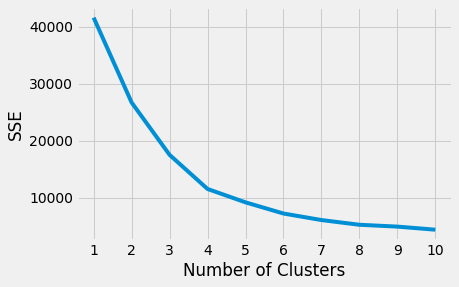

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']])
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install kneed
from kneed import KneeLocator

elbow = KneeLocator(
    range (1, 11), sse, curve='convex', direction='decreasing'
)

print("Best value for k: " + str(elbow.elbow))

Best value for k: 4


##### 2. Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 12):
  kmeans = KMeans(n_clusters=n_cluster).fit(
    df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']]
  )
  silhouette_avg = silhouette_score(
      df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']],
      kmeans.labels_
  )
  print('Silhouette score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette score for 2 Clusters: 0.5784
Silhouette score for 3 Clusters: 0.5966
Silhouette score for 4 Clusters: 0.5961
Silhouette score for 5 Clusters: 0.5537
Silhouette score for 6 Clusters: 0.5634
Silhouette score for 7 Clusters: 0.5070
Silhouette score for 8 Clusters: 0.4672
Silhouette score for 9 Clusters: 0.4694
Silhouette score for 10 Clusters: 0.4703
Silhouette score for 11 Clusters: 0.4670


In [ ]:
silhouette_score(df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']], kmeans.labels_)

0.46695637339355783

##### Strictly score-wise, k value of 3 has a slightly better silhouette score than the k value of 4.

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

three_cluster_df = df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]].copy(deep=True)
three_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
three_cluster_df.groupby('Cluster').count()['Total Spent']

Cluster
0     1735
1    10259
2     1873
Name: Total Spent, dtype: int64

##### Conclustion: result shows that, although the score for k=3 was slightly better, it seems like k=4 is more detailed

#### c. Interpreting the customer segmentations

In [ ]:
df_normalized.count()

Email            13845
Total Orders     13867
Total Spent      13867
AvgOrderValue    13867
dtype: int64

In [ ]:
df_normalized = df_normalized.set_index('Email')

In [ ]:
df_normalized.count()

Total Orders     13867
Total Spent      13867
AvgOrderValue    13867
dtype: int64

In [ ]:
X = df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']]
kmeans = KMeans(n_clusters=4, random_state=40).fit(X)

In [ ]:
kmeans.labels_

array([3, 1, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
cluster_analysis_df = X.copy(deep=True)
cluster_analysis_df['Cluster'] = kmeans.labels_

In [ ]:
cluster_analysis_df.head(15)

,Total Spent,Total Orders,AvgOrderValue,Cluster
Email,,,,
jashzielsamoy@gmail.com,-0.035561,-0.549951,2.345538,3
lydier350@gmail.com,-0.580471,-0.549951,-0.505937,1
stephannie.l.rundle@medtronic.com,-0.351773,-0.549951,0.690821,1
stuartgnielson@gmail.com,-0.630076,-0.549951,-0.765516,1
ana.jorge339@gmail.com,-0.630076,-0.549951,-0.765516,1
wavy.chris72@icloud.com,-0.392211,-0.549951,0.479217,1
richard.niu03@gmail.com,-0.456335,-0.549951,0.143657,1
mebleyle@gmail.com,-0.511044,-0.549951,-0.142631,1
bumblebee37@gmail.com,-0.506188,-0.549951,-0.117218,1


In [ ]:
kmeans.cluster_centers_

array([[ 1.10898461,  1.32656792, -0.17192328],
       [-0.3832426 , -0.33187233, -0.34109049],
       [ 5.64613778,  5.27050682,  0.17456614],
       [ 0.05372373, -0.4825556 ,  2.12675554]])

In [ ]:
cluster_analysis_df.groupby('Cluster').count()['Total Spent']

Cluster
0    2286
1    9670
2     191
3    1720
Name: Total Spent, dtype: int64

##### 1. look at the cluster with the highest total spent

In [ ]:
high_value_cluster_0 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 0]
high_value_cluster_1 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 1]
high_value_cluster_2 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 2]
high_value_cluster_3 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 3]

high_value_cluster = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 2]
high_value_cluster.head()

,Total Spent,Total Orders,AvgOrderValue,Cluster
Email,,,,
joeandangelina300@gmail.com,10.209297,7.753810,0.519441,2
kadinorton@gmail.com,5.251144,5.760907,-0.112602,2
zeusandjen@gmail.com,5.081119,3.103703,0.870205,2
wood.emily.marie@gmail.com,8.849451,8.750261,0.044669,2
aleishad22@gmail.com,3.054012,4.432305,-0.434835,2


In [ ]:
high_value_cluster_0.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,2286.000000,2286.000000,2286.000000,2286.0
mean,1.108985,1.326568,-0.171923,0.0
std,0.692471,0.679546,0.382102,0.0
min,-0.050279,0.446500,-1.036937,0.0
25%,0.604408,0.778650,-0.418979,0.0
50%,0.956981,1.110801,-0.253712,0.0
75%,1.421252,1.775102,0.017574,0.0
max,3.944520,4.432305,2.057477,0.0


In [ ]:
high_value_cluster_1.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,9670.000000,9670.000000,9670.000000,9670.0
mean,-0.383243,-0.331872,-0.341090,1.0
std,0.264225,0.325373,0.392635,0.0
min,-0.794996,-0.549951,-1.680654,1.0
25%,-0.580421,-0.549951,-0.596181,1.0
50%,-0.486316,-0.549951,-0.401691,1.0
75%,-0.263317,-0.217801,-0.142631,1.0
max,0.608409,0.778650,0.909427,1.0


In [ ]:
high_value_cluster_2.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,191.000000,191.000000,191.000000,191.0
mean,5.646138,5.270507,0.174566,2.0
std,2.778266,2.227044,0.634675,0.0
min,2.144772,1.442951,-0.962167,2.0
25%,3.668101,3.768004,-0.199911,2.0
50%,4.758713,4.764456,0.044669,2.0
75%,6.708911,6.093057,0.356398,2.0
max,18.658768,15.061119,3.768238,2.0


In [ ]:
high_value_cluster_3.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,1720.000000,1720.000000,1720.000000,1720.0
mean,0.053724,-0.482556,2.126756,3.0
std,0.419953,0.171855,1.318222,0.0
min,-0.309057,-0.549951,0.790659,3.0
25%,-0.184227,-0.549951,1.417434,3.0
50%,-0.104765,-0.549951,1.747872,3.0
75%,0.187735,-0.549951,2.419379,3.0
max,3.660320,0.778650,11.853221,3.0


In [ ]:
# bringing in the original shopify dataset and analyze
# set the email as index keys for both datasets
df_original = df_original.set_index('Email')

# add the AvgOrderValue
df_original['AvgOrderValue'] = df_original['Total Spent'] / df_original['Total Orders']

df_original.index = df_original.index.map(str)
high_value_cluster.index = high_value_cluster.index.map(str)

high_value_cluster

,Total Spent,Total Orders,AvgOrderValue,Cluster
Email,,,,
joeandangelina300@gmail.com,10.209297,7.753810,0.519441,2
kadinorton@gmail.com,5.251144,5.760907,-0.112602,2
zeusandjen@gmail.com,5.081119,3.103703,0.870205,2
wood.emily.marie@gmail.com,8.849451,8.750261,0.044669,2
aleishad22@gmail.com,3.054012,4.432305,-0.434835,2
...,...,...,...,...
m_elle79@hotmail.com,9.488119,8.750261,0.159914,2
heidibb93@hotmail.com,8.602765,7.089509,0.353944,2
josephine.sivertsson@hotmail.com,18.658768,15.061119,0.424257,2


In [ ]:
df_original.loc[high_value_cluster.index].describe()

,Total Spent,Total Orders,AvgOrderValue
count,191.000000,191.000000,191.000000
mean,1302.467801,18.523560,72.211916
std,560.639945,6.704925,24.474654
min,595.910000,7.000000,28.376667
25%,903.310000,14.000000,57.771144
50%,1123.390000,17.000000,67.202759
75%,1516.930000,21.000000,79.223814
max,3928.350000,48.000000,210.792857


In [ ]:
# we pinpoint the customers in cluster 3 now

pd.DataFrame(
    df_original.loc[
              high_value_cluster.index].groupby(
               'Country').count()['Total Spent'].sort_values(
                   ascending=False).head()
)

,Total Spent
Country,
United States,148
Canada,10
United Kingdom,8
Australia,7
Germany,5


In [ ]:
df_original.loc[high_value_cluster.index]

,First Name,Last Name,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt,AvgOrderValue
Email,,,,,,,,,,,,,,,,,,,
joeandangelina300@gmail.com,Rachael,Eversole,NaN,1001 East 2nd street,Unit 1,Anamosa,Iowa,IA,United States,US,52205,(319) 651-1552,yes,2223.29,26,"Active Subscriber, ANNUAL",NaN,no,85.511154
kadinorton@gmail.com,Kat,Stevens,NaN,966 W 1325 S,NaN,Cedar City,Utah,UT,United States,US,84720,4355924465,yes,1222.76,20,"Active Subscriber, SEASONAL",NaN,no,61.138000
zeusandjen@gmail.com,Jennifer,Svane,NaN,2607 Larlin Dr,NaN,Everett,Washington,WA,United States,US,98203,(504) 952-4375,yes,1188.45,12,"Active Subscriber, ANNUAL",NaN,no,99.037500
wood.emily.marie@gmail.com,Emily,Wood,NaN,1102 East 1st Street,NaN,McCook,Nebraska,NE,United States,US,69001,+13083408995,yes,1948.88,29,"Active Subscriber, ANNUAL",NaN,no,67.202759
aleishad22@gmail.com,aleisha,Layne,NaN,655 fair park ave,NaN,marion,Ohio,OH,United States,US,43302,7403609310,yes,779.39,16,NaN,NaN,no,48.711875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_elle79@hotmail.com,Michelle,Butler,NaN,4169 checkmate dr,NaN,Anchorage,Alaska,AK,United States,US,99508,(907) 406-4148,yes,2077.76,29,"Active Subscriber, ANNUAL, newsletter",NaN,no,71.646897
heidibb93@hotmail.com,Heidi,Bjørneklett,NaN,Matre 16,NaN,Matredal,NaN,NaN,Norway,NO,5984,'+47 976 03 010,yes,1899.10,24,"Active Subscriber, ANNUAL, SEASONAL",NaN,no,79.129167
josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625


In [ ]:
top_50 = df_original.sort_values('Total Spent', ascending=False).head(50)

In [ ]:
top_50
# export the top 50, then for each email (key), get all the items they purchased and do analysis

,First Name,Last Name,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt,AvgOrderValue
Email,,,,,,,,,,,,,,,,,,,
josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625
tmanini@hotmail.com,Tara,Manini,NaN,325 Coronado Ave,304,Daly City,California,CA,United States,US,94015,4153857538,yes,3807.53,29,"Active Subscriber, SEASONAL",NaN,no,131.294138
aortiz258@hotmail.com,Alba,Ortiz Reyes,NaN,1494 W 2165 S,NaN,Wellsvile,Utah,UT,United States,US,84339,+17872200693,yes,3434.52,36,"Active Subscriber, ANNUAL, newsletter",NaN,no,95.403333
maw105_92@yahoo.com,Willimae,Villajin,NaN,1122 W 204th Street,NaN,Torrance,California,CA,United States,US,90502,(619) 882-7123,yes,3193.07,42,"Active Subscriber, ANNUAL, SEASONAL",NaN,no,76.025476
k.guidry1992@gmail.com,Kereka,Guidry,NaN,19509 Divot Place,NaN,Gaithersburg,Maryland,MD,United States,US,20886,+12404419922,yes,2784.17,33,"Active Subscriber, ANNUAL",NaN,no,84.368788
angelhuliv@gmail.com,Angel,Hu,NaN,120 Carson Rd.,NaN,Seneca,South Carolina,SC,United States,US,29678,'+1 864-325-5936,yes,2718.45,19,"Active Subscriber, ANNUAL",NaN,no,143.076316
lynne1021@gmail.com,Courtney,Wirtz,NaN,1706 Sandusky North Street,NaN,Pittsburgh,Pennsylvania,PA,United States,US,15214,+14126803869,yes,2608.96,29,"Active Subscriber, ANNUAL, newsletter",NaN,no,89.964138
megan_kay@live.com,Megan,Butler Stoney,NaN,"Flat 1, 38 Turama Rd, Royal Oak",NaN,Auckland,Auckland,AUK,New Zealand,NZ,1023,+64212049228,yes,2558.98,42,"Active Subscriber, ANNUAL",NaN,no,60.928095
bannana_1444@hotmail.com,Hannah,Horejsi,NaN,66874 200th St,NaN,Alden,Minnesota,MN,United States,US,56009,(507) 383-8929,yes,2537.16,43,"Active Subscriber, ANNUAL",NaN,no,59.003721


In [ ]:
top_50.to_csv('top_50_vips.csv')

In [ ]:
# get all orders data from shopify and combine to one dataset

all_files = ['orders_export_1.csv', 'orders_export_2.csv', 'orders_export_3.csv']

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [ ]:
# for each email within the vip list, find all orders that has been made from them
matched_df = top_50.merge(df, on='Email', how='inner')
matched_df.head()

,Email,First Name,Last Name,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone_x,Accepts Marketing_x,Total Spent,Total Orders,Tags_x,Note,Tax Exempt,AvgOrderValue,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing_y,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,...,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags_y,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone_y,Receipt Number,Duties
0,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625,#DBB100436782KR,paid,2020-12-08 01:30:54 -0500,unfulfilled,NaN,yes,USD,60.97,15.99,0.0,76.96,52b54d8faef5,10.00,International Shipping - Estimated Time of Arr...,2020-12-08 01:30:53 -0500,1,[Pre-Order] STRAY KIDS 2021 Season's Greetings,69.99,NaN,Album Set - 140110 - STRAY KIDS - 스트레이 키즈 2021...,...,073-396 55 79,Josephine Sivertsson,Bergslagsvagen 43,Bergslagsvagen 43,NaN,NaN,Finspang,61236,NaN,SE,073-396 55 79,NaN,created_at: 1606416812\nmc_cid: 1ba60b0575\nRe...,NaN,PayPal Express Checkout,c15211933466737.2,0.0,STRAY KIDS,0.0,NaN,NaN,NaN,2.968210e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
1,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625,#DBB100436782KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-08 01:30:53 -0500,1,Route Package Protection - $0.98,0.98,NaN,ROUTEINS10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Route,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
2,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625,#DBB100436754KR,paid,2020-12-07 17:26:23 -0500,unfulfilled,NaN,yes,USD,120.22,15.99,0.0,136.21,ADEQA,6.32,International Shipping - Estimated Time of Arr...,2020-12-07 17:26:22 -0500,1,BoA Official Light Stick,54.00,60.0,Lightstick - 120006\t- BoA - 보아 공식응원봉 - DA,...,073-396 55 79,Josephine Sivertsson,Bergslagsvagen 43,Bergslagsvagen 43,NaN,NaN,Finspang,61236,NaN,SE,073-396 55 79,NaN,RecartSessionId: 5fbfca7d9dcc2657cba10683\nRec...,NaN,PayPal Express Checkout,c15194295763057.1,0.0,BoA,0.0,NaN,NaN,NaN,2.967275e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
3,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625,#DBB100436754KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-07 17:26:22 -0500,1,BLACKPINK Official Light Stick Ver.2 (Limited ...,69.99,NaN,Lightstick - 120049 - BLACKPINK - 블랙핑크 공식 응원봉 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLACKPINK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
4,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625,#DBB100436754KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-07 17:26

In [ ]:
matched_df = matched_df[['Email',  'First Name', 'Last Name', 'Address1', 'City', 'Province Code', 'Country', 'Country Code', 'Zip', 'Total Spent', 'AvgOrderValue', 'Total Orders', 'Tags_x', 'Vendor', 'Id', 'Lineitem name', 'Lineitem sku', 'Lineitem quantity', 'Lineitem price', 'Subtotal', 'Paid at', 'Discount Code']]

In [ ]:
matched_df.head(50)

,Email,First Name,Last Name,Address1,City,Province Code,Country,Country Code,Zip,Total Spent,AvgOrderValue,Total Orders,Tags_x,Vendor,Id,Lineitem name,Lineitem sku,Lineitem quantity,Lineitem price,Subtotal,Paid at,Discount Code
0,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",STRAY KIDS,2.968210e+12,[Pre-Order] STRAY KIDS 2021 Season's Greetings,Album Set - 140110 - STRAY KIDS - 스트레이 키즈 2021...,1,69.99,60.97,2020-12-08 01:30:54 -0500,52b54d8faef5
1,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",Route,NaN,Route Package Protection - $0.98,ROUTEINS10,1,0.98,NaN,NaN,NaN
2,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",BoA,2.967275e+12,BoA Official Light Stick,Lightstick - 120006\t- BoA - 보아 공식응원봉 - DA,1,54.00,120.22,2020-12-07 17:26:23 -0500,ADEQA
3,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",BLACKPINK,NaN,BLACKPINK Official Light Stick Ver.2 (Limited ...,Lightstick - 120049 - BLACKPINK - 블랙핑크 공식 응원봉 ...,1,69.99,NaN,NaN,NaN
4,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",Route,NaN,Route Package Protection - $2.55,ROUTEINS18,1,2.55,NaN,NaN,NaN
5,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",The Daebak Company,2.930572e+12,Esther Bunny is Daebak - Annual Auto renew (Sh...,Esther Bunny is Daebak - Annual,1,259.96,259.96,2020-11-26 10:31:45 -0500,NaN
6,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",The Daebak Company,2.930535e+12,CJ is Daebak - Annual Auto renew (Ships every ...,CJ is Daebak - Annual,1,159.96,163.31,2020-11-26 10:15:20 -0500,NaN
7,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",Route,NaN,Route Package Protection - $3.35,ROUTEINS22,1,3.35,NaN,NaN,NaN
8,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",Daebak Box,2.919386e+12,"Annual (ships once every season, auto-renews e...",DBB_Annual,1,0.00,0.00,NaN,NaN
9,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,81.840625,48,"Active Subscriber, ANNUAL, newsletter",The Daebak Company,2.895230e+12,Flower Pattern Mask 2ea - Sky Blue / Ivory Pink,Health - 150037 - The Daebak Company - Flower ...,1,23.99,96.09,2020-11-11 11:48:47 -0500,NaN


In [ ]:
matched_df.loc[matched_df.duplicated(['Email']), ['Email', 'First Name', 'Last Name', 'Address1', 'City', 'Province Code', 'Country Code', 'Zip', 'Total Spent', 'AvgOrderValue', 'Tags_x', 'Total Orders']] = np.nan

In [ ]:
matched_df.to_csv('top_50_vip_orders.csv')

## 3. Customer segmentation by Gaussian Mixture Model

#### a. Training the model

In [ ]:
from sklearn.mixture import GaussianMixture

gaussian = GaussianMixture(n_components = 3, n_init = 10)
gaussian.fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
gaussian.weights_

array([0.53789022, 0.2908014 , 0.17130838])

In [ ]:
gaussian.means_

array([[-0.54995124, -0.45336818,  0.15918297],
       [ 0.17667625, -0.01354004, -0.38633322],
       [ 1.4268753 ,  1.44651285,  0.15599515]])

In [ ]:
gaussian.covariances_

array([[[ 1.00000000e-06,  6.43289385e-31, -4.10351470e-31],
        [ 6.46673727e-31,  5.56538578e-02,  2.91227563e-01],
        [-4.27273180e-31,  2.91227563e-01,  1.52397473e+00]],

       [[ 1.81688324e-01,  1.30983912e-01, -7.44602783e-03],
        [ 1.30983912e-01,  1.10980745e-01,  2.49882205e-02],
        [-7.44602783e-03,  2.49882205e-02,  6.02801667e-02]],

       [[ 2.48997571e+00,  2.30774110e+00, -3.61802138e-01],
        [ 2.30774110e+00,  2.73577729e+00,  1.03749461e-01],
        [-3.61802138e-01,  1.03749461e-01,  5.92304451e-01]]])

In [ ]:
gaussian.converged_

True

In [ ]:
gaussian.n_iter_

12

In [ ]:
gaussian.predict(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

array([0, 0, 0, ..., 2, 0, 1])

In [ ]:
probs = gaussian.predict_proba(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

In [ ]:
x_new, y_new = gaussian.sample(6)
x_new

array([[-0.55075793, -0.56243462, -0.40653287],
       [-0.54874289, -0.14382676,  1.77718774],
       [-0.55052018, -0.70340477, -1.14614269],
       [-0.54914444, -0.97527068, -2.5814925 ],
       [-0.55103179, -0.69860453, -1.11793013],
       [ 0.10340572,  0.08329324, -0.04077962]])

In [ ]:
y_new

array([0, 0, 0, 0, 0, 1])

In [ ]:
gaussian.score_samples(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

array([  8.64168389,  10.06488497,  10.11726899, ..., -20.7576123 ,
        10.19715996,  -0.09032056])

In [ ]:
X = df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]]

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


In [ ]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X['Total Orders'], X['Total Spent'], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X['Total Orders'], X['Total Spent'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    # for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
    #     draw_ellipse(pos, covar, alpha=w * w_factor)
    
    for pos, covar, w in zip(gmm.means_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
# gaussian = GaussianMixture(n_components=4, random_state=42)
# plot_gmm(gaussian, X)